In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import dataframe_image as dfi

In [2]:
chopped = pd.read_csv('data/chopped.csv')

In [3]:
chopped.isnull().sum()

season                0
season_episode        0
series_episode        0
episode_name          0
episode_notes       113
air_date              0
judge1                1
judge2                1
judge3                1
appetizer             0
entree                0
dessert               1
contestant1           1
contestant1_info     13
contestant2           0
contestant2_info     14
contestant3           0
contestant3_info     13
contestant4           0
contestant4_info     14
dtype: int64

In [4]:
# Drop irrelevant rows
#chopped = chopped.drop(columns=['season','season_episode','series_episode','air_date','appetizer','entree','dessert','contestant1','contestant2','contestant3','contestant4'])
keep = ['episode_name','episode_notes','judge1','judge2','judge3','contestant1_info','contestant2_info','contestant3_info','contestant4_info']
chopped = chopped[keep]
chopped.head()

,episode_name,episode_notes,judge1,judge2,judge3,contestant1_info,contestant2_info,contestant3_info,contestant4_info
0,"""Octopus, Duck, Animal Crackers""",This is the first episode with only three offi...,Marc Murphy,Alex Guarnaschelli,Aarón Sánchez,Private Chef and Nutrition Coach New York NY,Private Chef and Sous chef Bar Blanc New Yo...,Pastry Chef Olana Restaurant New York NY,Catering Chef Showstoppers Catering at Union...
1,"""Tofu, Blueberries, Oysters""",This is the first of a few episodes with five ...,Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,Private Caterer and Culinary Instructor West...,Chef de cuisine Liberty National Golf Course...,Executive Chef and Owner Ted and Honey Broo...,Owner and Chef Chef for Hire LLC Newville PA
2,"""Avocado, Tahini, Bran Flakes""",NaN,Aarón Sánchez,Alex Guarnaschelli,Marc Murphy,Executive Chef and Co-owner La Palapa New Y...,Chef de cuisine SoHo Grand Hotel New York NY,Private Chef New York NY,Chef tournant L’Atelier de Joël Robuchon Ne...
3,"""Banana, Collard Greens, Grits""","In the appetizer round, Chef Chuboda refused t...",Scott Conant,Amanda Freitag,Geoffrey Zakarian,Executive Chef Ayza Wine Bar New York NY,Chef Registered Dietician and Culinary Consu...,Executive Chef Knickerbocker Bar & Grill Ne...,Chef and Owner Taïm New York NY
4,"""Yucca, Watermelon, Tortillas""",NaN,Geoffrey Zakarian,Alex Guarnaschelli,Marc Murphy,Personal Chef New York NY,Executive Chef New York NY,Executive Chef / Wine Director Bloomingdale ...,Chef de cuisine Gordon Ramsay at The London ...


In [5]:
for i, col in enumerate(chopped.columns):
    chopped.iloc[:, i] = chopped.iloc[:, i].str.replace('"', '')

In [6]:
# create new column to include all information in one string
chopped['combined'] = chopped[keep].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [7]:
# calculate TFIDFvectorizor scores
# ngram_range=(1,3),
vectorizer = TfidfVectorizer(ngram_range=(1,3),stop_words='english',min_df=.01,max_df=.8)
tfidf = vectorizer.fit_transform(chopped['combined'])
tfidf

<569x1167 sparse matrix of type '<class 'numpy.float64'>'
	with 27533 stored elements in Compressed Sparse Row format>

In [8]:
vectorizer

TfidfVectorizer(max_df=0.8, min_df=0.01, ngram_range=(1, 3),
                stop_words='english')

In [9]:
# calculate similarity scores between all episodes
cosine_sim = cosine_similarity(tfidf)


In [10]:
# create function to print similar episodes and similarity scores
def get_recs(episode_name):
    enumerated = enumerate(cosine_sim[chopped[chopped['episode_name'] == episode_name].index[0]])
    listed = list(enumerated)
    sorteds = sorted(listed,key = lambda x:x[1], reverse=True)[:10]
    return sorteds

# create function to print names of similar episodes
def get_names(episode_name):
    sorteds = get_recs(episode_name)
    j = 0
    for i in sorteds[1:]:
        episode = chopped.iloc[i[0]].episode_name
        print('Episode ', i[0]+1, ': ', episode)
        j+=1

In [11]:
# test function
episode = "Octopus, Duck, Animal Crackers"
get_recs(episode)

[(0, 1.0),
 (36, 0.5126709799782215),
 (41, 0.44883123887885856),
 (554, 0.4357045335728815),
 (21, 0.41187529198186135),
 (2, 0.39817326433455863),
 (13, 0.37974451426695144),
 (78, 0.3775370795004665),
 (35, 0.3727629212045674),
 (53, 0.3719341217947912)]

In [12]:
# test get_names
get_names(episode)

Episode  37 :  Raw Enthusiasm
Episode  42 :  Jitters & Giant Eggs
Episode  555 :  Lighten Up!
Episode  22 :  Buckwheat Blunders and Twists of Fate
Episode  3 :  Avocado, Tahini, Bran Flakes
Episode  14 :  A Prickly Situation
Episode  79 :  Canned Cheese, Please!
Episode  36 :  In A Pinch
Episode  54 :  Wok This Way


In [13]:
# test get_names
get_names(episode)

Episode  37 :  Raw Enthusiasm
Episode  42 :  Jitters & Giant Eggs
Episode  555 :  Lighten Up!
Episode  22 :  Buckwheat Blunders and Twists of Fate
Episode  3 :  Avocado, Tahini, Bran Flakes
Episode  14 :  A Prickly Situation
Episode  79 :  Canned Cheese, Please!
Episode  36 :  In A Pinch
Episode  54 :  Wok This Way


In [14]:
get_names('It\'s a Sibling Thing')

Episode  498 :  Whiz Kid Cooks
Episode  253 :  Teen Tournament: Part Two
Episode  255 :  Teen Tournament: Part Four
Episode  192 :  Teen Invasion
Episode  254 :  Teen Tournament: Part Three
Episode  306 :  Teen Tournament: Episode Three
Episode  309 :  Teen Tournament: Grand Finale
Episode  307 :  Teen Tournament: Episode Four
Episode  252 :  Teen Tournament: Part One


In [15]:
get_names('Chopped All-Stars: Judges')

Episode  170 :  Chopped All-Stars: Mega Chefs
Episode  120 :  All-Stars: Judge Remix
Episode  289 :  Judges' Face-Off
Episode  172 :  Chopped All-Stars: Celebrities
Episode  297 :  Rock Stars
Episode  169 :  Chopped All-Stars: Food Network vs. Cooking Channel
Episode  117 :  All-Stars: Iron Chefs Do Battle
Episode  229 :  Chopped Tournament of Stars: Sports Stars!
Episode  173 :  Chopped All-Stars: Finale!


# Visualize Episode Clusters

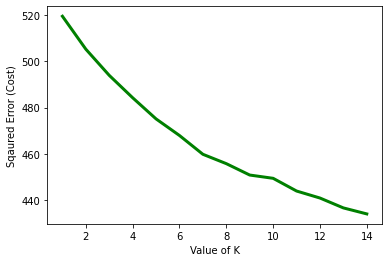

In [56]:
cost =[] 
for i in range(1, 15): 
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(tfidf)
      
    # calculates squared error 
    # for the clustered points 
    cost.append(kmeans.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 15), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.savefig(r'images/elbow-plot')

In [16]:
k = 7

model = KMeans(n_clusters=k, init='k-means++',max_iter=100,n_init=1,random_state=0)
model.fit(tfidf)

KMeans(max_iter=100, n_clusters=7, n_init=1, random_state=0)

In [17]:
chopped['cluster'] = model.labels_

In [18]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" %i)
    for j in order_centroids[i, :10]: # print most relevant terms in cluster
        print(' %s' % terms[j])
    print('---')

Cluster centroids: 

Cluster 0:
 episode
 age
 ny episode
 tournament
 york ny episode
 champions
 chopped
 round
 winner
 ny
---
Cluster 1:
 owner
 chef owner
 executive
 executive chef
 ny
 sous chef
 sous
 ma
 boston ma
 boston
---
Cluster 2:
 ca
 angeles
 los angeles
 san
 los
 angeles ca
 los angeles ca
 francisco
 executive
 san francisco
---
Cluster 3:
 charity
 nan nan
 stars
 nan
 nan nan nan
 foundation
 tournament
 stars tournament
 chopped
 celebrity
---
Cluster 4:
 ny
 round
 episode
 executive
 executive chef
 new
 amanda freitag
 freitag
 amanda
 marc murphy
---
Cluster 5:
 ny
 york
 new york
 new york ny
 york ny
 new
 executive
 ny executive
 executive chef
 ny executive chef
---
Cluster 6:
 las
 vegas
 las vegas
 las vegas nv
 vegas nv
 nv
 pastry
 pastry chef
 round
 owner
---


In [21]:
cluster_descriptions = ['0: Champions/Tournaments','1: Northeast Chefs','2: California Chefs','3: Celebrity/Charity','5: NY Chefs/Popular Judges','5: NY Executive Chefs','6: Las Vegas/Pastry']

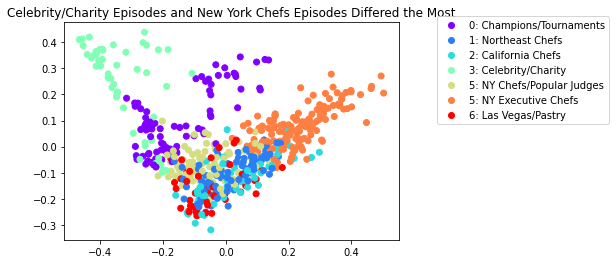

In [22]:
## visualizing cluster

kmean_indices = model.fit_predict(tfidf)

pca = PCA()
scatter_plot_points = pca.fit_transform(tfidf.toarray())
centers_reduced = pca.transform(model.cluster_centers_)

scatter = plt.scatter(scatter_plot_points[:, 0], scatter_plot_points[:, 1], c=chopped['cluster'],
            cmap='rainbow')
labels = np.unique(chopped['cluster'])
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, cluster_descriptions,bbox_to_anchor=(1.1, 1.05))
plt.title('Celebrity/Charity Episodes and New York Chefs Episodes Differed the Most')
plt.savefig(r'images/PCA Plot')

In [26]:
top_10 = chopped.iloc[[0,507,265,168,50,12,295,288,170],[0,1,-1]] #.sort_values(by=['cluster'])

In [40]:
pd.set_option('display.max_colwidth', None)

In [41]:
top_10

,episode_name,episode_notes,cluster
0,"Octopus, Duck, Animal Crackers",This is the first episode with only three official ingredients in a basket (dessert round). There would be no hard set limit until season 4.,5
507,It's a Sibling Thing,"This was a team cook episode where the duos were young siblings. As with most other child-themed Chopped episodes, the first round was extended to 30 minutes.",0
265,Chopped Family Thanksgiving,This was a special Thanksgiving episode where the competitors were regular Chopped judges who were playing to win money for the charity No Kid Hungry. This is the first episode to have four judges on the judging panel instead of the usual three so the contestants had to make five plates instead of the usual four.,3
168,Chopped All-Stars: Food Network vs. Cooking Channel,"This is the second tournament of the season. This time it's a 5-part charity tournament. As with previous celebrity/all-star tournaments, the winner gets $50,000 for their charity. This heat featured two Food Network personalities and two Cooking Channel personalities.",3
50,Crunch Time,"This was the first appearance of Madison Cowan, who would go on to appear on various Food Network shows as a contestant and a judge including Iron Chef America, Beat Bobby Flay, and Guy's Grocery Games.",5
12,"Strawberries, Turkey and Gummi Bears",NaN,1
295,Tendon Intentions,"The trash fish in round 2 was scut fish (specifically 'porgy', as stated in the Chopped: After Hours segment for this episode). Chef Almodovar has competed in various food competitions including Cutthroat Kitchen and Hell's Kitchen.",1
288,Judges' Face-Off,"All basket ingredients were leftovers. All contestants were Chopped judges and were competing for charity. The Tex-Mex condiments consisted of guacamole, salsa, and sour cream.",3
170,Chopped All-Stars: Judges,"This is part 3 of a 5-part charity tournament. This heat featured Chopped judges, all of whom have competed on Chopped previously except for Scott Conant.",3


In [25]:
with pd.option_context('display.max_colwidth', None):
  display(chopped.iloc[[0,507,265,168,50,12,295,288,170],[0,1,-1]])

,episode_name,episode_notes,cluster
0,"Octopus, Duck, Animal Crackers",This is the first episode with only three official ingredients in a basket (dessert round). There would be no hard set limit until season 4.,5
507,It's a Sibling Thing,"This was a team cook episode where the duos were young siblings. As with most other child-themed Chopped episodes, the first round was extended to 30 minutes.",0
265,Chopped Family Thanksgiving,This was a special Thanksgiving episode where the competitors were regular Chopped judges who were playing to win money for the charity No Kid Hungry. This is the first episode to have four judges on the judging panel instead of the usual three so the contestants had to make five plates instead of the usual four.,3
168,Chopped All-Stars: Food Network vs. Cooking Channel,"This is the second tournament of the season. This time it's a 5-part charity tournament. As with previous celebrity/all-star tournaments, the winner gets $50,000 for their charity. This heat featured two Food Network personalities and two Cooking Channel personalities.",3
50,Crunch Time,"This was the first appearance of Madison Cowan, who would go on to appear on various Food Network shows as a contestant and a judge including Iron Chef America, Beat Bobby Flay, and Guy's Grocery Games.",5
12,"Strawberries, Turkey and Gummi Bears",NaN,1
295,Tendon Intentions,"The trash fish in round 2 was scut fish (specifically 'porgy', as stated in the Chopped: After Hours segment for this episode). Chef Almodovar has competed in various food competitions including Cutthroat Kitchen and Hell's Kitchen.",1
288,Judges' Face-Off,"All basket ingredients were leftovers. All contestants were Chopped judges and were competing for charity. The Tex-Mex condiments consisted of guacamole, salsa, and sour cream.",3
170,Chopped All-Stars: Judges,"This is part 3 of a 5-part charity tournament. This heat featured Chopped judges, all of whom have competed on Chopped previously except for Scott Conant.",3


# Web App

In [16]:
import pickle

pickle.dump(chopped.to_dict(), open('episodes.pkl','wb'))

In [15]:
chopped['episode_name'].values

array(['Octopus, Duck, Animal Crackers', 'Tofu, Blueberries, Oysters',
       'Avocado, Tahini, Bran Flakes', 'Banana, Collard Greens, Grits',
       'Yucca, Watermelon, Tortillas',
       'Canned Peaches, Rice Cakes, Beets', 'Quail, Arctic Char, Beer',
       'Coconut, Calamari, Donuts', 'Mac & Cheese, Cola, Bacon',
       'String Cheese, Jicama, Gingersnaps',
       'Jumbo Shrimp, Pepperoncini, Cereal',
       'Chocolate, Mussels and Figs',
       'Strawberries, Turkey and Gummi Bears', 'A Prickly Situation',
       'Salty Veggies & Heated Battles', 'High Hopes',
       'Floundering Around', 'Pride on the Plate',
       'Pretty Please with a Pepper on Top',
       'Pods, Grills and Sticky Fingers', 'A Wish Upon A Starfruit',
       'Buckwheat Blunders and Twists of Fate',
       'Chopped Champions Event, Round One: The Ultimate Face-off',
       'Chopped Champions Event, Round Two: Best of the Best',
       'Chopped Champions Event, Round Three: All-Stars Showdown',
       'Chopped C

In [17]:
pickle.dump(cosine_sim,open('cosine_sim.pkl','wb'))